In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Просмотр данных и предобработка

In [72]:
data = pd.read_csv('stud_math.xls')
display(data.sample(5))
data.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
251,GP,M,16,U,GT3,T,3.0,3.0,at_home,other,reputation,other,3.0,2.0,0.0,yes,yes,no,no,no,-6.0,yes,NaN,no,5.0,3.0,3.0,2.0,6.0,50.0
326,GP,M,17,U,GT3,T,3.0,3.0,other,services,reputation,mother,1.0,1.0,0.0,no,no,no,yes,no,-3.0,yes,yes,no,4.0,3.0,5.0,5.0,3.0,80.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,-6.0,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
225,GP,F,18,R,GT3,T,3.0,1.0,other,other,reputation,mother,1.0,2.0,1.0,no,no,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,4.0,16.0,35.0
357,MS,F,17,U,LE3,NaN,3.0,2.0,services,other,reputation,mother,2.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,no,yes,1.0,2.0,3.0,5.0,2.0,55.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

395 строк. Видно, в каких столбцах есть пустые значения и сколько их. 
С помощью функции заменим пропуски в некоторых столбцах (где тип данных - объект) и подробнее изучим каждый столбец

In [3]:
def no_info(column):
    '''Функция заменяет пропуски в выбранном столбце на "no_info"'''
    data[column] = data[column].fillna(value='no_info')


no_info(['address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
         'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

In [4]:
def median_data(column):
    '''Функция заменяет пропуски на медианные данные в числовом столбце'''
    data[column] = data[column].fillna(value=data[column].median())


def mode_data(column):
    '''Функция заменяет пропуски на моду в числовом столбце'''
    data[column] = data[column].fillna(value=data[column].mode()[0])


def get_boxplot(column):
    """Функция для создания boxplot"""
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.boxplot(x=column, y='score',
                data=data.loc[data.loc[:, column].isin(
                    data.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(column):
    """Функция для поиска статистически значимых различий для колонок"""
    cols = data.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                     data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


def noinfo_to_other(column):
    '''Функция для замены в столбце no_info на other'''
    data[column] = data[column].apply(
        lambda x: 'other' if x == 'no_info' else x)

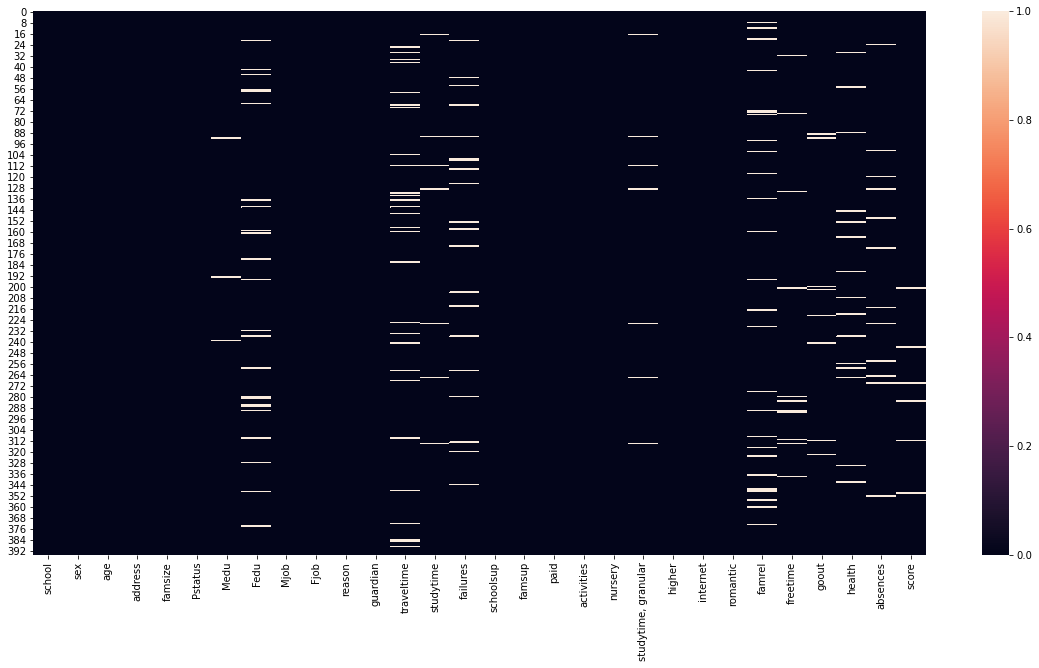

In [5]:
# Тепловая карта "пустых" значений (т.е. Nan). Белые полоски - пропуски в данных
# Наша первостепенная цель - избавиться от этих пустых значений
ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(data.isnull())

In [6]:
data.corr()  # Проверим сразу корреляцию, поскольку на тепловой карте присутствуют похожие пропущенные значения у двух столбцов

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


Видно, что коэфф. корреляция между "studytime, granular" и  "studytime" равен -1, что говорит нам о том, что эти данные по сути показывают одну и ту же информацию. Удалим один из этих столбцов

In [7]:
# Удаляем этот, так как совсем не понятно, что он обозначает
data = data.drop('studytime, granular', 1)

-----

# Изучаем данные в каждом столбце отдельно

## score

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

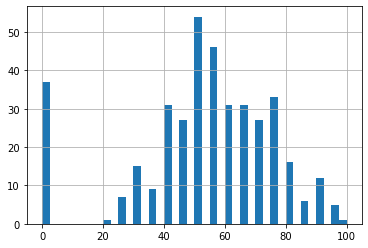

In [8]:
display(data.score.value_counts())
data.score.hist(bins=40)

У 37-ми человек оценка "0" и они очень похожи на выбросы. Но удалять их нельзя, посколько не известно, что это значит (и правда 0 баллов, неявка, списывание или т.п.).

Шесть значений отсутствуют. Эти оценки - самые важные данные, поэтому можно смело удалять такие строчки с Nan

In [9]:
# Удаляем строки, в который в столбце score нет информации
data = data.dropna(subset=['score'])

## school

In [10]:
# Смотрим, если ли пропущенные значения и ошибки в столбце школы
data.school.value_counts()

GP    344
MS     45
Name: school, dtype: int64

Пропущенные значения и ошибки не наблюдаются

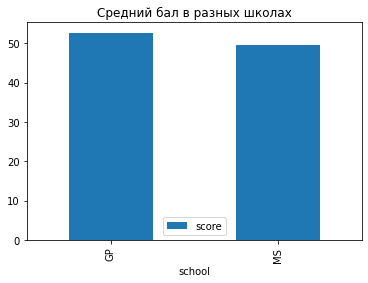

In [11]:
data.pivot_table(values='score',
                 index=['school'],
                 aggfunc='mean').plot(kind='bar', title='Средний бал в разных школах')

## sex

In [12]:
data.sex.value_counts()  # Смотрим, если ли прощенные значения и ошибки в столбце пола

F    204
M    185
Name: sex, dtype: int64

Пропущенные значения и ошибки не наблюдаются

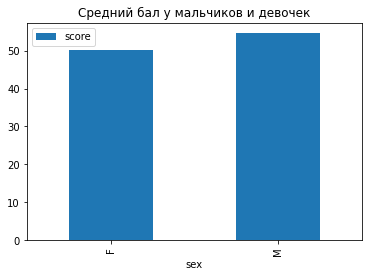

In [13]:
data.pivot_table(values='score',
                 index=['sex'],
                 aggfunc='mean').plot(kind='bar', title='Средний бал у мальчиков и девочек')

## age

In [14]:
# Проверяем, если ли пропущенные значения и ошибки в столбце возраста
data.age.value_counts()

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

Пропущенные значения и ошибки не наблюдаются

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

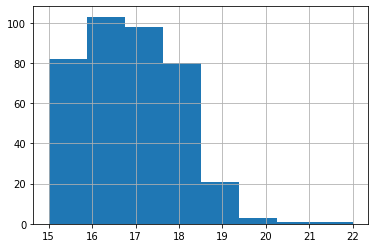

In [15]:
display(data.age.value_counts())
data.age.hist(bins=8)  # Распределение по возрасту детей.

Есть всего 5 детей, чей возраст больше 19. На данный момент не вижу причины считать их выбросами и  не учитывать при дальнейшем построении модели. И первоначальная цель проекта - 'отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет'
## address

In [16]:
display(data.address.value_counts())

U          291
R           83
no_info     15
Name: address, dtype: int64

Отсутствуют данные о типе адреса 15-ти учеников. Можно предположить, что те, кто живут за городом тратят времени на дорогу в школу больше часа. 

In [17]:
# Смотрим на медиану данных о времени поездки в школу, видим что она равна 1
data.traveltime.describe()

count    361.000000
mean       1.434903
std        0.692660
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [18]:
# Меняем пустые значения в столбце времени пути на медиану (т.е. 1)
median_data('traveltime')

In [19]:
data[data['address'] == 'no_info'].traveltime

6      1.0
52     2.0
75     1.0
92     1.0
96     2.0
159    1.0
168    1.0
241    1.0
254    1.0
292    1.0
348    1.0
354    2.0
359    2.0
372    1.0
376    2.0
Name: traveltime, dtype: float64

Видим, что все добираются до школы меньше часа, значит можем заменить информацию о адресе на 'U'

<ipython-input-20-b1cee3317569>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.address[data['address'] == 'no_info'] = 'U'


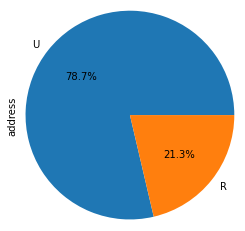

In [20]:
data.address[data['address'] == 'no_info'] = 'U'
data.address.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## famsize

In [21]:
display(data.famsize.value_counts())

GT3        255
LE3        107
no_info     27
Name: famsize, dtype: int64

Отсутсвуют данные о размере семьи 27-ми учеников. Заменим эти значения на моду (т.е. GT3), это чуть меньше отразится на процентную разницу между данными о размере семьи. И переименуем значения для лучшего понимания

<ipython-input-22-d58c6399afb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.famsize[data['famsize'] == 'no_info'] = 'GT3'


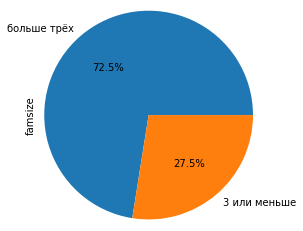

In [22]:
data.famsize[data['famsize'] == 'no_info'] = 'GT3'
data.famsize = data.famsize.apply(
    lambda x: "3 или меньше" if x == 'LE3' else 'больше трёх')
data.famsize.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## Pstatus

In [23]:
display(data.Pstatus.value_counts())

T          308
no_info     45
A           36
Name: Pstatus, dtype: int64

Отсутсвуют данные о статусе совместного проживания родителей 45-и учеников (это 11,4% от общего количества). На мой взгляд не корректно это данные относить к совместному проживанию или отдельному (будет большая разница в конечном результате при дальнейшем исследовании этих двух вариантов). 
Так же переименую данные для более приятного восприятния

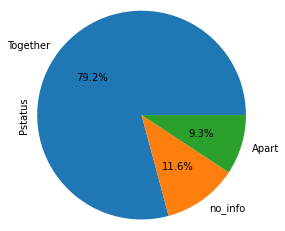

In [24]:
data.Pstatus = data.Pstatus.apply(
    lambda x: 'Together' if x == 'T' else 'Apart' if x == 'A' else x)
data.Pstatus.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## Medu

In [25]:
display(data.Medu.value_counts())
display(data.Medu.value_counts().sum())  # Сумма не Nan значений

4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
Name: Medu, dtype: int64

386

Нет информации об образовании троих матерей. Заменим эти пустые данные на моду этого столбца и переименуем данные для лучшего восприятия. 

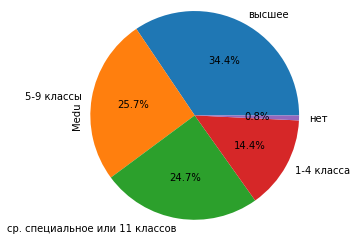

In [26]:
mode_data('Medu')
data.Medu = data.Medu.apply(lambda x: 'нет' if x == 0 else
                            '1-4 класса' if x == 1 else
                            '5-9 классы' if x == 2 else
                            'ср. специальное или 11 классов' if x == 3 else
                            'высшее')
data.Medu.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## Fedu 

In [27]:
display(data.Fedu.value_counts())
display(data.Fedu.value_counts().sum())  # Сумма не Nan значений

2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: Fedu, dtype: int64

365

Нет информации об образовании 24-х отцов + одна явная ошибка

In [28]:
data[data['Fedu'] > 4]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,больше трёх,no_info,5-9 классы,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


У этого же ученика отсутствует данные о статусе совместного жилья родителей, все остальные столбцы в порядке. Будем считать, что случилась опечатка, и вместо "4" напечатали "40". Изменим данное значение

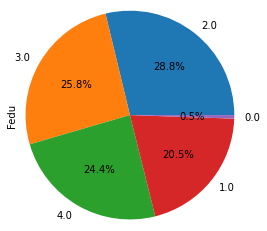

In [29]:
data.loc[11, 'Fedu'] = 4
data.Fedu.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

Посмотрим распределение оценок в зависимости от образования отца с помощью boxplot

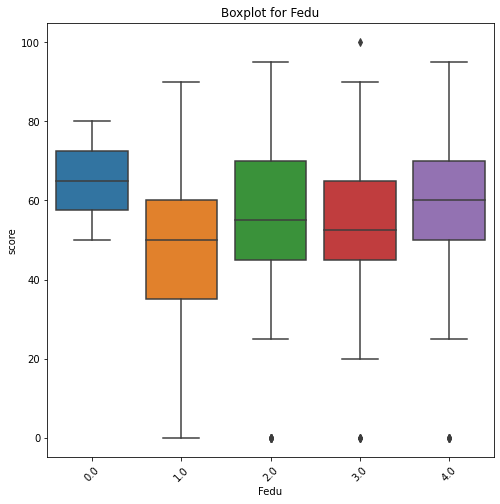

In [30]:
get_boxplot('Fedu')

Видно, что есть различие в оценках в разных случаях. Поэтому заполнять пустые строчки на мой взгляд не самая удачная идея. Добавим их в отдельную группу "no_info" и переименнуем остальные варианты для большей наглядности

In [31]:
no_info("Fedu")
data.Fedu = data.Fedu.apply(lambda x: 'нет' if x == 0 else
                            '1-4 класса' if x == 1 else
                            '5-9 классы' if x == 2 else
                            'ср. специальное или 11 классов' if x == 3 else
                            'высшее' if x == 4 else x)

5-9 классы                        105
ср. специальное или 11 классов     94
высшее                             89
1-4 класса                         75
no_info                            24
нет                                 2
Name: Fedu, dtype: int64

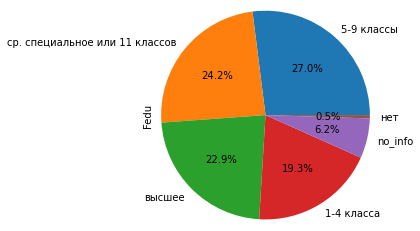

In [32]:
display(data.Fedu.value_counts())
data.Fedu.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## Mjob

In [33]:
data.Mjob.value_counts()

other       127
services     98
at_home      58
teacher      55
health       32
no_info      19
Name: Mjob, dtype: int64

Отсутствуют 19 данных о работе матери. Отнесём эти данные в категорию "другие"

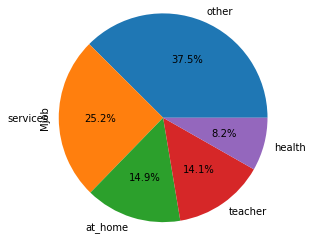

In [34]:
noinfo_to_other('Mjob')
data.Mjob.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## Fjob

In [35]:
data.Fjob.value_counts()

other       194
services     99
no_info      36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

Отсутсвуют 36 данных о работе отца. Отнесём данные в "другие"

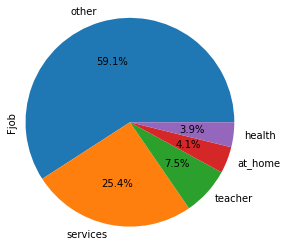

In [36]:
noinfo_to_other('Fjob')
data.Fjob.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## reason

In [37]:
data.reason.value_counts()

course        135
reputation    102
home          101
other          34
no_info        17
Name: reason, dtype: int64

Отсутствуют 17 данных. Так же отнесём их в категорию "другие".

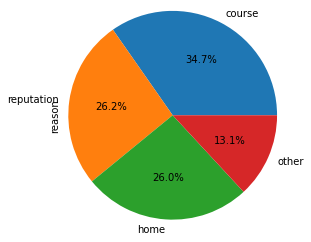

In [38]:
noinfo_to_other('reason')
data.reason.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## guardian 

In [39]:
data.guardian.value_counts()

mother     248
father      86
no_info     31
other       24
Name: guardian, dtype: int64

Нет информации о 31-м опекуне учеников (7.8%). Это большой процент, в группе "другие" всего 7.1%, поэтому оставлю эти данные в группе "без информации"

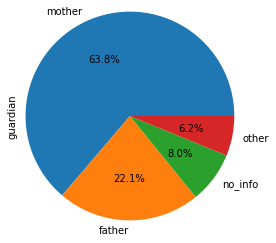

In [40]:
data.guardian.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## traveltime 

In [41]:
data.traveltime.value_counts()

1.0    267
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64

Выше уже заменил пустые данные на медиану этого столбца. Дополнительно переименую данные, для более комфортного восприятия

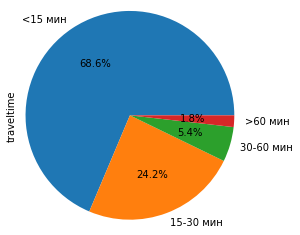

In [42]:
data.traveltime = data.traveltime.apply(lambda x: '<15 мин' if x == 1 else
                                        '15-30 мин' if x == 2 else
                                        '30-60 мин' if x == 3 else
                                        '>60 мин')
data.traveltime.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## studytime 

In [43]:
data.studytime.value_counts()

2.0    189
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64

Отсутствует информация о времени на учёбу для 7-ми учеников. Проверим медиану в этом столбце, и если это целое число - заменим эти пропуски медианой и дополнительно переименую для комфортного восприятия

In [44]:
data.studytime.median()

2.0

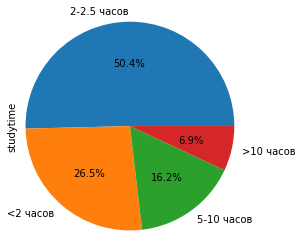

In [45]:
median_data('studytime')
data.studytime = data.studytime.apply(lambda x: '<2 часов' if x == 1 else
                                      '2-2.5 часов' if x == 2 else
                                      '5-10 часов' if x == 3 else
                                      '>10 часов')
data.studytime.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## failures

In [46]:
data.failures.value_counts()

0.0    290
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64

Отсутствует 22 данных о "количестве внеучебных неудач". Заменим эти пропуски модой (0.0, которая составляет более 75%).

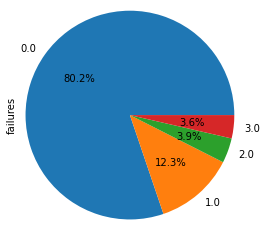

In [47]:
mode_data('failures')
data.failures.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## schoolsup и famsup 

In [48]:
display(data.schoolsup.value_counts())
data.famsup.value_counts()

no         331
yes         49
no_info      9
Name: schoolsup, dtype: int64

yes        216
no         135
no_info     38
Name: famsup, dtype: int64

В первом случае отсутствуют данные о 9-ти учениках, во втором - у 39. Объединим данные из этих столбиков в один, в котором будет информация об общей образовательной поддержки (не важно, семейной или другой дополнительной) 

In [49]:
# Создадим новый столбец просуммировав два столбца
data['support'] = data['schoolsup'] + data['famsup']

data.support = data.support.apply(lambda x: 'yes' if 'yes' in x              # Изменяем в нём данные на "yes", "no" или "no_info"
                                  else 'no_info' if x == 'no_infono_info'
                                  else 'no')

data.drop('schoolsup', axis=1, inplace=True)  # Удаляем столбец schoolsup
data.drop('famsup', axis=1, inplace=True)     # Удаляем столбец famsup

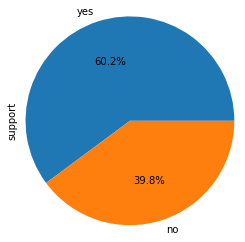

In [50]:
data.support.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## paid, activities, nursery higher, internet и romantic

In [51]:
display(data.paid.value_counts())
display(data.activities.value_counts())
display(data.nursery.value_counts())
display(data.higher.value_counts())
display(data.internet.value_counts())
data.romantic.value_counts()

no         197
yes        153
no_info     39
Name: paid, dtype: int64

yes        192
no         183
no_info     14
Name: activities, dtype: int64

yes        297
no          77
no_info     15
Name: nursery, dtype: int64

yes        350
no_info     20
no          19
Name: higher, dtype: int64

yes        300
no          55
no_info     34
Name: internet, dtype: int64

no         235
yes        123
no_info     31
Name: romantic, dtype: int64

Во всех этих столбцах есть всего два точных варианта (yes или no) и те ученики, для которых данные не известны (no_info).
Лучше оставлю этот третий вариант, чтобы сильно не менялось соотношение между yes и no, что исказит результаты корреляции с score. (В принципе можно было в столбце nursery заменить no_info на моду (yes), но мною решено, что раз остальные не трогаю, то и этот не трогать будет правильнее)

## famrel

In [52]:
data.famrel.value_counts()

 4.0    178
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Отсутствует 27 данных, и одно не верное (-1). Можно предположить, что это опечатка, поэтому заменим на 1.
А пропуски заменим модой.

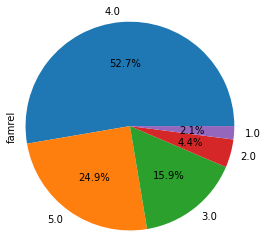

In [53]:
data.loc[(data[data['famrel'] == -1].index), 'famrel'] = 1
mode_data('famrel')
data.famrel.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## freetime

In [54]:
display(data.freetime.value_counts())
data.freetime.describe()

3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
Name: freetime, dtype: int64

count    380.000000
mean       3.223684
std        0.993364
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

Отсутствует 9 данных. Заменим пропуски на медианные данные (которые так же являются модой)

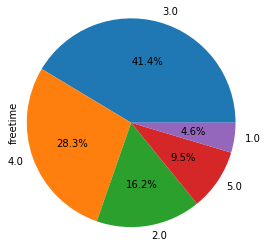

In [55]:
median_data('freetime')
data.freetime.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## goout

In [56]:
display(data.goout.value_counts())

3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
Name: goout, dtype: int64

Отсутствует 7 данных. Посмотрим внимательно на данные связанные со временем об этих учениках.

In [57]:
data[data['goout'].isnull()][['traveltime', 'studytime', 'freetime']]

,traveltime,studytime,freetime
89,<15 мин,2-2.5 часов,1.0
92,<15 мин,2-2.5 часов,3.0
200,<15 мин,2-2.5 часов,3.0
202,<15 мин,2-2.5 часов,4.0
221,<15 мин,5-10 часов,3.0
241,<15 мин,2-2.5 часов,3.0
322,<15 мин,5-10 часов,3.0


Все они тратят мало времени на дорогу до учёбы. На основе двух других колонок сделаем предположение о их времени с друзьями и заполним пропуски. Разумеется это время не может превышать свободное время

In [58]:
data.loc[89, 'goout'] = 1.0
data.loc[92, 'goout'] = 3.0
data.loc[200, 'goout'] = 3.0
data.loc[202, 'goout'] = 4.0
data.loc[221, 'goout'] = 2.0
data.loc[241, 'goout'] = 3.0
data.loc[322, 'goout'] = 2.0

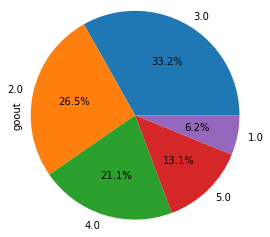

In [59]:
data.goout.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## health

In [60]:
data.health.value_counts()

5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
Name: health, dtype: int64

Отсутсвуют 15 значений. На мой взгляд заполнять пропуски модой или медианой тут не лучший вариант, посколько точно нарушится соотношение в результате, так как разница между количеством разных вариантов не существенная. Поэтому в пропуски добавим в отдельную группу "no_info".

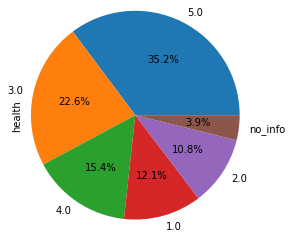

In [61]:
no_info('health')
data.health.value_counts().plot(kind='pie', autopct='%1.1f%%', radius=1.2)

## absences

In [62]:
display(data.absences.value_counts())
data.absences.value_counts().sum()

0.0     110
2.0      60
4.0      52
6.0      30
8.0      20
       ... 
38.0      1
40.0      1
23.0      1
17.0      1
28.0      1
Name: absences, Length: 36, dtype: int64

378

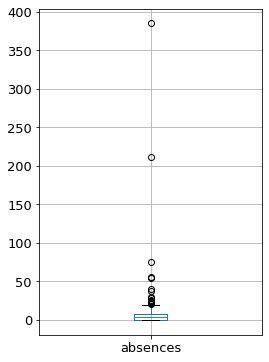

In [63]:
data.boxplot(column = 'absences', fontsize = 13, figsize = (4,6))

Отсутствует 11 значений. Судя по построенному boxplot есть выбросы, но чисто теоретически можем быть столько много пропусков в ученика, поэтому эти данные нельзя удалять. Посмотрим внимательно на строчки, в которых есть пропуски в этой колонке

In [64]:
data[data['absences'].isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,support
24,GP,F,15,R,больше трёх,Together,5-9 классы,высшее,services,health,course,mother,<15 мин,5-10 часов,0.0,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5,NaN,40.0,yes
101,GP,M,16,U,больше трёх,Together,высшее,высшее,services,teacher,other,father,<15 мин,5-10 часов,0.0,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4,NaN,85.0,yes
120,GP,F,15,U,больше трёх,Together,1-4 класса,5-9 классы,at_home,other,course,mother,<15 мин,2-2.5 часов,0.0,no,no,no,yes,yes,no,3.0,2.0,3.0,1,NaN,75.0,no
129,GP,M,16,R,больше трёх,Together,высшее,высшее,teacher,teacher,course,mother,<15 мин,2-2.5 часов,0.0,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4,NaN,90.0,no
150,GP,M,18,U,3 или меньше,Together,1-4 класса,1-4 класса,other,other,course,mother,<15 мин,<2 часов,3.0,no,no,yes,no,yes,yes,2.0,3.0,5.0,4,NaN,0.0,no
172,GP,M,17,U,больше трёх,Together,высшее,высшее,teacher,other,reputation,mother,<15 мин,2-2.5 часов,0.0,yes,yes,yes,yes,yes,no,4.0,4.0,4.0,5,NaN,50.0,yes
215,GP,F,17,U,3 или меньше,Together,ср. специальное или 11 классов,5-9 классы,other,other,reputation,mother,15-30 мин,2-2.5 часов,0.0,no_info,no,yes,yes,no_info,no,4.0,4.0,4.0,1,NaN,75.0,no
227,GP,M,17,U,3 или меньше,no_info,5-9 классы,ср. специальное или 11 классов,services,services,reputation,father,<15 мин,2-2.5 часов,0.0,yes,no,no,no_info,yes,no,5.0,3.0,3.0,3,NaN,60.0,yes
254,GP,M,17,U,больше трёх,Together,5-9 классы,1-4 класса,other,other,course,mother,<15 мин,<2 часов,0.0,no,no,no,yes,yes,no,4.0,4.0,2.0,5,NaN,60.0,no
265,GP,M,18,R,3 или меньше,no_info,ср. специальное или 11 классов,высшее,other,other,reputation,mother,15-30 мин,2-2.5 часов,0.0,yes,yes,yes,yes,yes,no,4.0,2.0,5.0,1,NaN,85.0,yes


На первый взгяд никакой зависимости от других колонок придумать нельзя и объяснить причину пропуска в данных очень трудно. Поэтому просто заменим  Nan на медиану

In [65]:
median_data('absences')

# Перепроверка и выбор данных для последующего построения модели

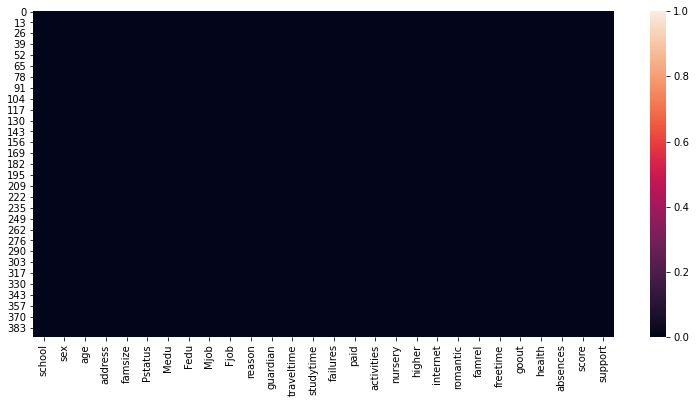

In [66]:
# Тепловая карта "пустых" значений (т.е. Nan). Проверяем, остались ли пропуски (белые черточки)
ax = plt.subplots(figsize=(13, 6))
ax = sns.heatmap(data.isnull(), vmax=1)

In [67]:
data.corr()  # Ещё раз смотрим корреляцию, после того, как избавились от пропусков

,age,failures,famrel,freetime,goout,absences,score
age,1.000000,0.206279,0.056941,0.013994,0.121972,0.095475,-0.155726
failures,0.206279,1.000000,-0.028517,0.087558,0.100001,0.057144,-0.337187
famrel,0.056941,-0.028517,1.000000,0.164830,0.071141,-0.079844,0.052902
freetime,0.013994,0.087558,0.164830,1.000000,0.305451,0.008199,0.017481
goout,0.121972,0.100001,0.071141,0.305451,1.000000,-0.049591,-0.118491
absences,0.095475,0.057144,-0.079844,0.008199,-0.049591,1.000000,0.062642
score,-0.155726,-0.337187,0.052902,0.017481,-0.118491,0.062642,1.000000


Видим, что столбов с одной и той же информацией нет, разные колонки коррелируются по разному. Для дальнейшей модели будем использовать все эти колонки (age, failures, famrel, freetime, goout, absences и score, разумеется). 

Построим boxplot для всех остальных колонок (по оси y - score).

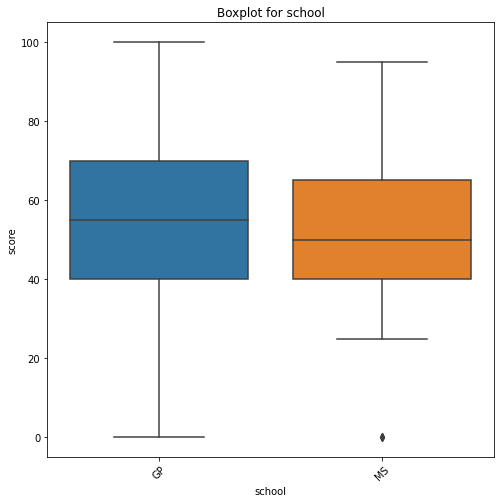

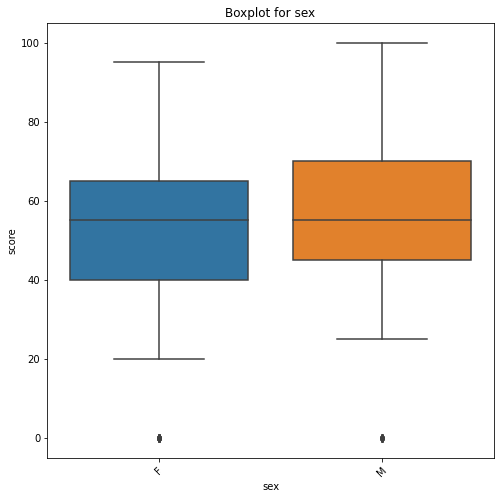

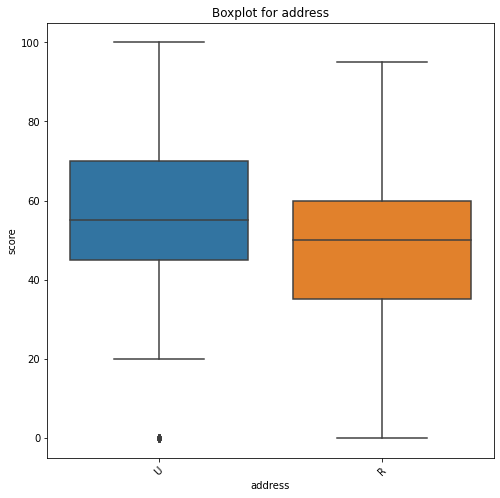

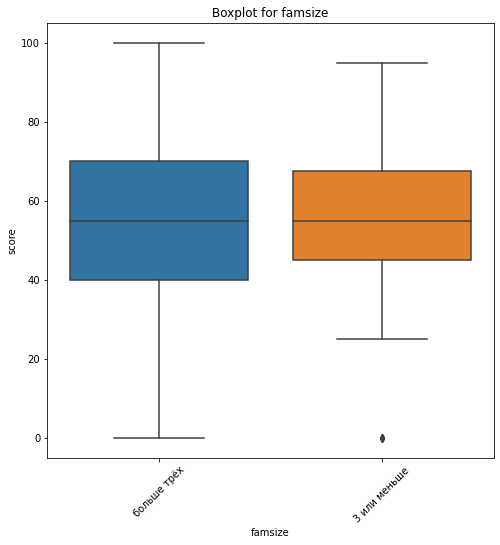

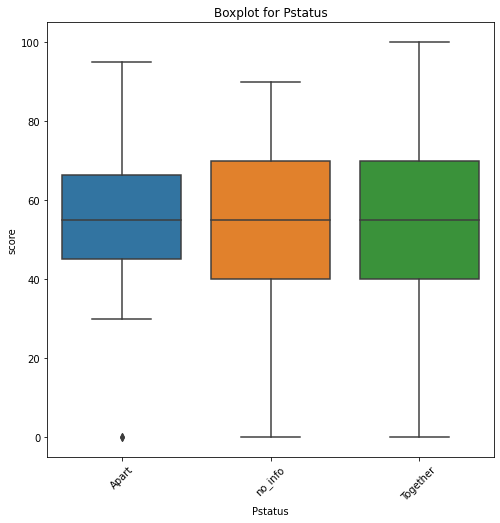

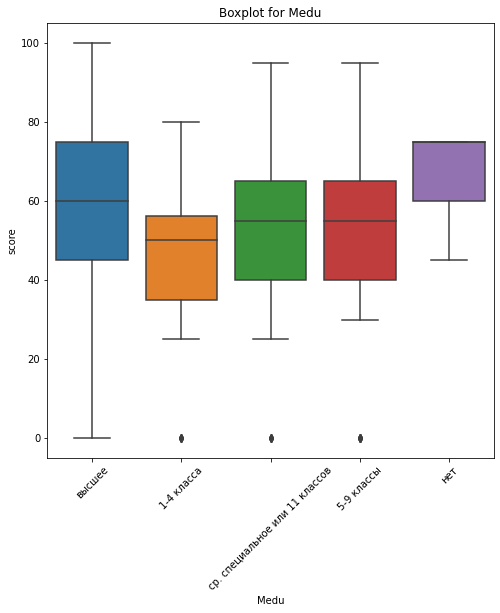

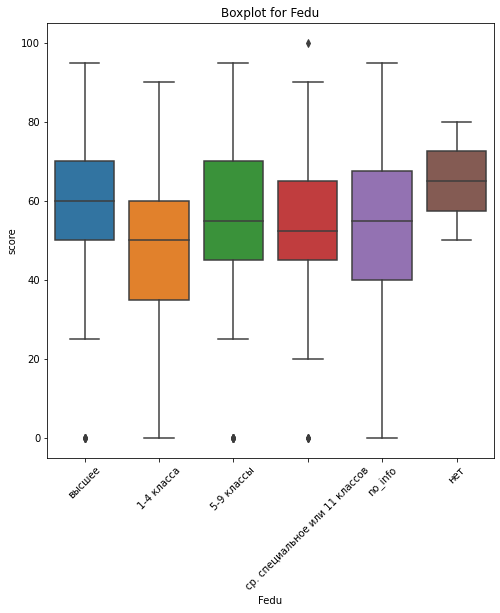

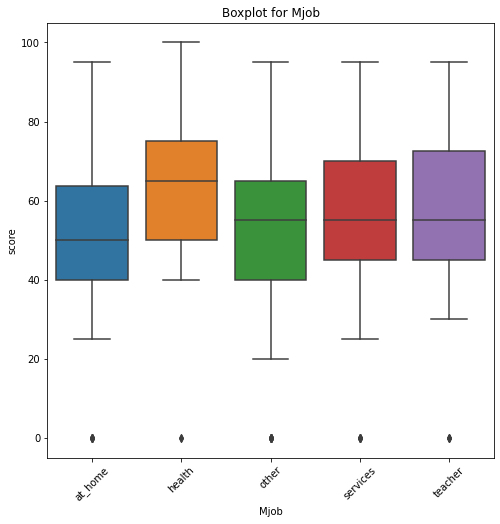

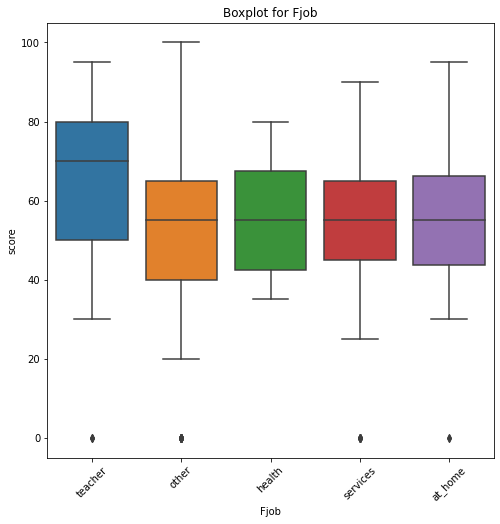

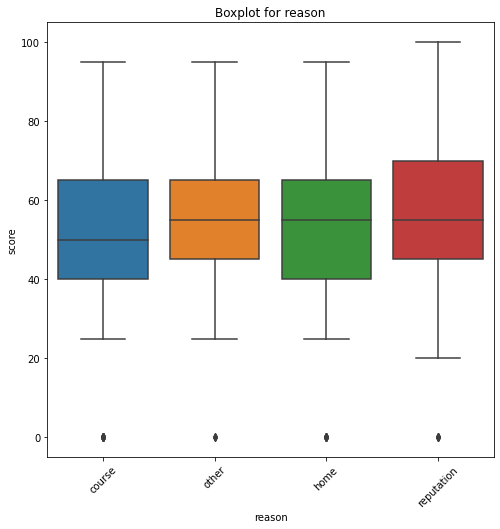

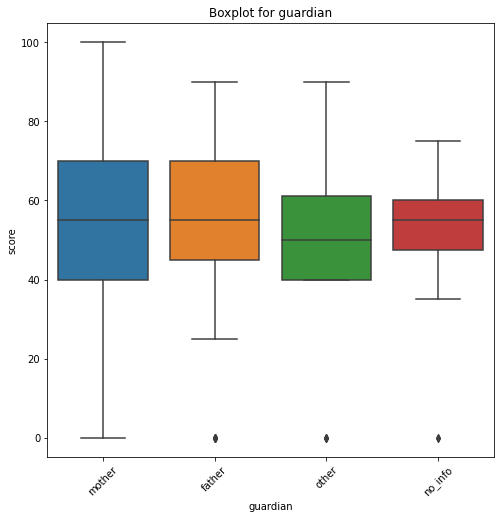

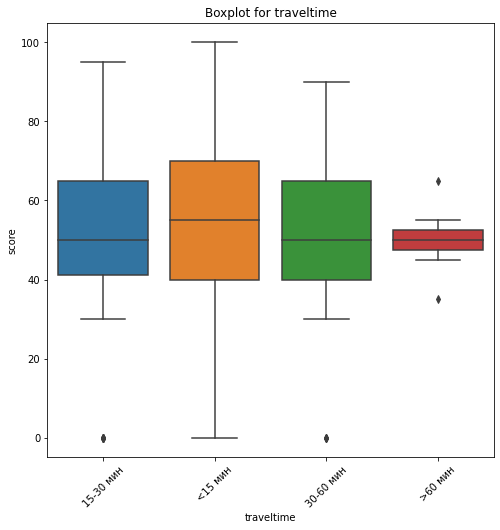

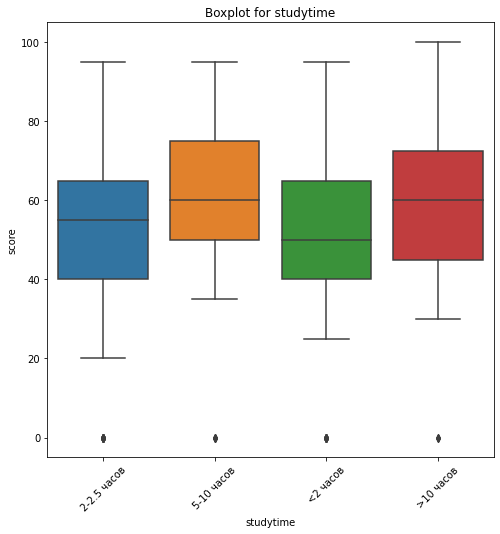

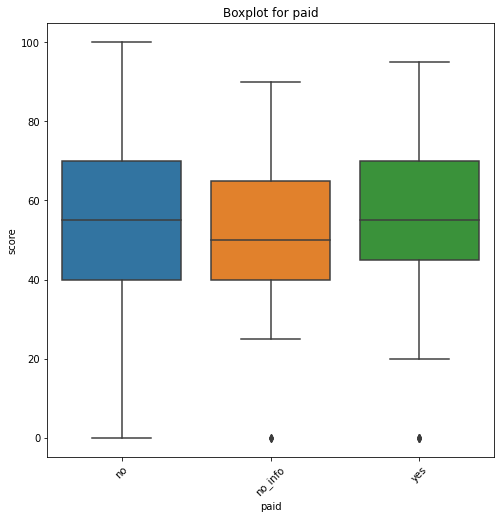

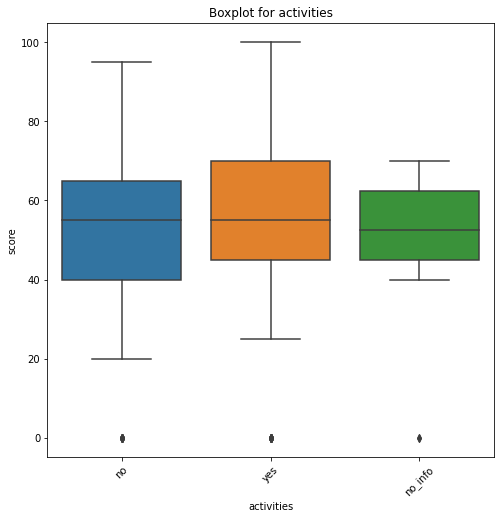

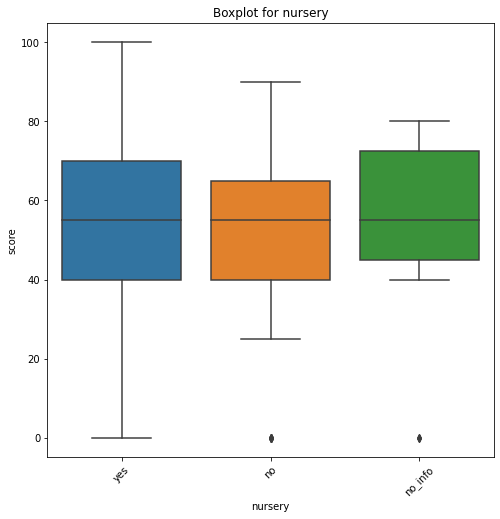

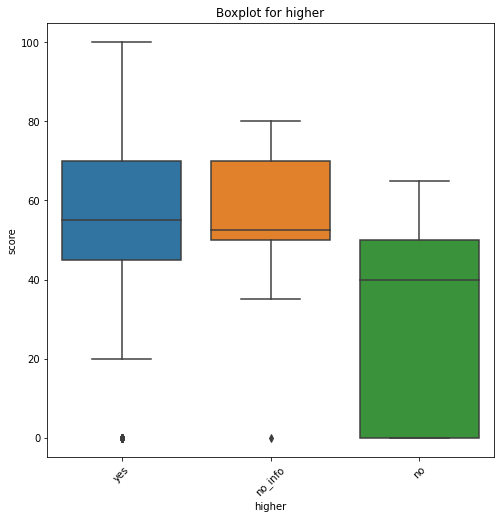

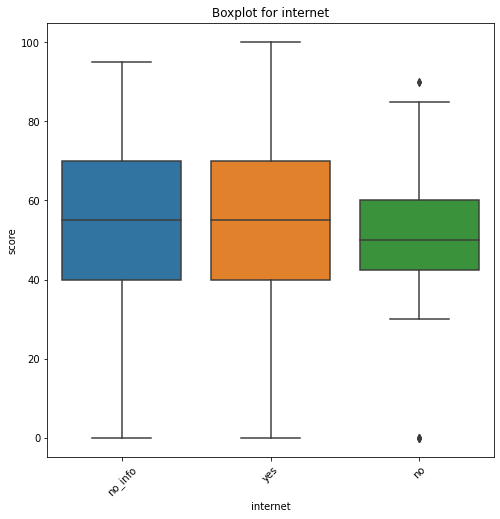

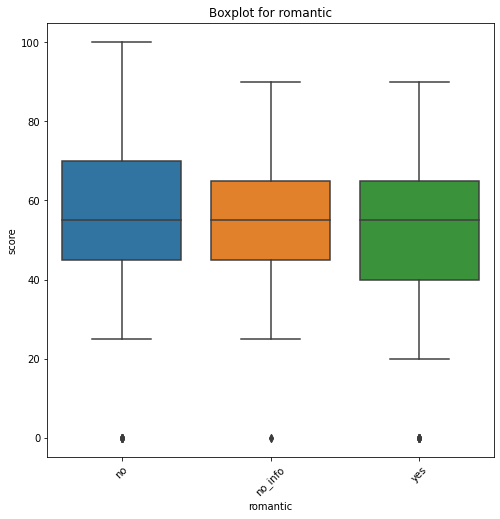

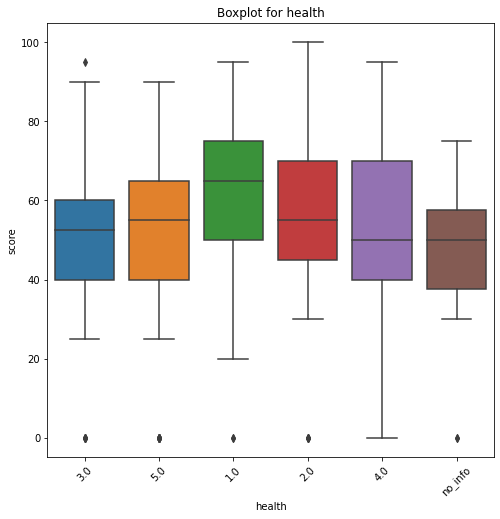

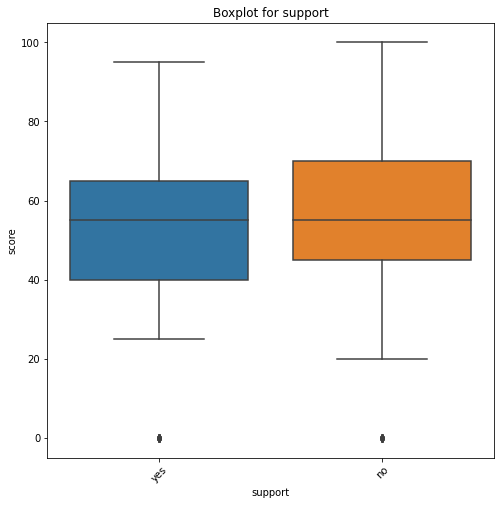

In [68]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
            'studytime', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'health', 'support']:
    get_boxplot(col)

Глядя на boxplot-ы, можно оставить колонки adress, Medu, Fedu, Mjob, Fjob, studytime, higher, romantic и health. Остальные визуально мало чем отличаются (т.е. мало как влияют на score). 

С помощью теста Стьюдента выясним для каких колонок могут быть найдены статистически значимые различия

In [69]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'support']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


# Выводы

Для дальнейшей работы по построению модели необходимо использовать все числовые колонки (age, failures, famrel,	freetime, goout, absences). Из номинативных переменных обязательно необходимо использовать те колонки, которые прошли тест Стьюдента.

В итоге данные для модели: 

In [70]:
data_for_model = data.loc[:, ['age', 'failures', 'famrel', 'freetime', 'goout', 'absences', 'address', 'Medu', 'Mjob',
                              'higher', 'romantic', 'score']]
data_for_model.head()

,age,failures,famrel,freetime,goout,absences,address,Medu,Mjob,higher,romantic,score
0,18,0.0,4.0,3.0,4.0,6.0,U,высшее,at_home,yes,no,30.0
1,17,0.0,5.0,3.0,3.0,4.0,U,1-4 класса,at_home,yes,no,30.0
2,15,3.0,4.0,3.0,2.0,10.0,U,1-4 класса,at_home,yes,no_info,50.0
3,15,0.0,3.0,2.0,2.0,2.0,U,высшее,health,yes,yes,75.0
4,16,0.0,4.0,3.0,2.0,4.0,U,ср. специальное или 11 классов,other,yes,no,50.0


коротые могут быть дополненны колонками Fedu, Fjob, studytime и health